<a href="https://colab.research.google.com/github/janasmoore/datasciencecoursera-repo/blob/master/JanaMooreD213_Task2_CodeOnly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jana Moore**

**D213 Task #2**

Western Governors University

MSDS July 2023



In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import callbacks
from keras.layers import *
from keras.preprocessing import sequence
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
# Import data
# Data was recieved from professor with review and rating already in correct formatitng
Review = pd.read_csv('Review')
Review.head()

,Review,Rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
# Review the summary of the data set
Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Rating  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Add two columns to the data set to find the number of words and characters in each review
Review['Words'] = [len(x.split()) for x in Review['Review'].tolist()]
Review['Char'] = Review['Review'].apply(len)
Review.head()

,Review,Rating,Words,Char
0,So there is no way for me to plug it in here i...,0,21,82
1,"Good case, Excellent value.",1,4,27
2,Great for the jawbone.,1,4,22
3,Tied to charger for conversations lasting more...,0,11,79
4,The mic is great.,1,4,17


In [ ]:
# lowercase all the reviews
Review['Review'] = Review['Review'].str.lower()
Review.head()

,Review,Rating,Words,Char
0,so there is no way for me to plug it in here i...,0,21,82
1,"good case, excellent value.",1,4,27
2,great for the jawbone.,1,4,22
3,tied to charger for conversations lasting more...,0,11,79
4,the mic is great.,1,4,17


In [ ]:
# Remove punctuation
punc = re.compile(r'[^\w\s]+')
Review['Review'] = [punc.sub('', x) for x in Review['Review'].tolist()]
Review.head()

,Review,Rating,Words,Char
0,so there is no way for me to plug it in here i...,0,21,82
1,good case excellent value,1,4,27
2,great for the jawbone,1,4,22
3,tied to charger for conversations lasting more...,0,11,79
4,the mic is great,1,4,17


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


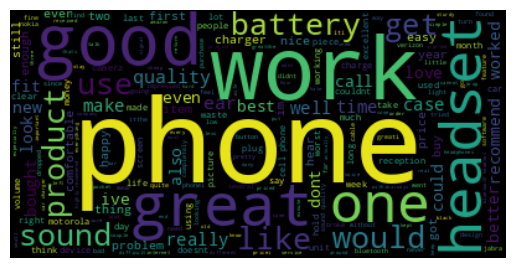

In [ ]:
from IPython.lib.display import join
# Word cloud
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.update(['br','href'])
textt = "".join(Review for Review in Review.Review)
wordcloud = WordCloud(stopwords = stopwords).generate(textt)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('wordcloud_1.png')
plt.show()

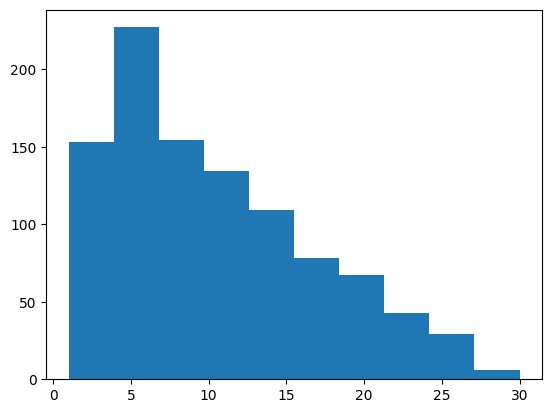

In [ ]:
plt.hist(Review['Words'])
plt.show()

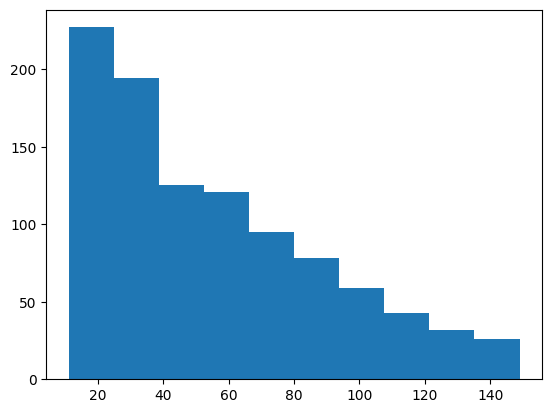

In [ ]:
plt.hist(Review['Char'])
plt.show()

In [ ]:
# vocabulary size
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

Review_tk = []
for sentance in Review.Review:
  Review_tk.append([word for word in word_tokenize(sentance) if word not in stopwords])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vocabulary = 50000
x = Review_tk
print('''\n''',x)
tokenizer = Tokenizer(num_words = vocabulary)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
print('''\n''',x)


 [['way', 'plug', 'us', 'unless', 'go', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'jawbone'], ['tied', 'charger', 'conversations', 'lasting', '45', 'minutesmajor', 'problems'], ['mic', 'great'], ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume'], ['several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one'], ['razr', 'owneryou', 'must'], ['needless', 'say', 'wasted', 'money'], ['waste', 'money', 'time'], ['sound', 'quality', 'great'], ['impressed', 'going', 'original', 'battery', 'extended', 'battery'], ['two', 'seperated', 'mere', '5', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset'], ['good', 'quality', 'though'], ['design', 'odd', 'ear', 'clip', 'comfortable'], ['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'], ['advise', 'everyone', 'fooled'], ['far', 'good'], ['works', 'great'], ['clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last'], ['w

In [ ]:
print(tokenizer.word_index)

{'phone': 1, 'great': 2, 'good': 3, 'product': 4, 'quality': 5, 'headset': 6, 'works': 7, 'battery': 8, 'sound': 9, 'use': 10, 'one': 11, 'well': 12, 'ear': 13, 'would': 14, 'work': 15, 'dont': 16, 'like': 17, 'case': 18, 'ive': 19, 'excellent': 20, 'time': 21, 'price': 22, 'recommend': 23, 'really': 24, 'im': 25, 'best': 26, 'service': 27, 'get': 28, 'nice': 29, 'also': 30, '2': 31, 'new': 32, 'love': 33, 'worked': 34, 'charger': 35, 'money': 36, 'buy': 37, 'item': 38, 'better': 39, 'ever': 40, 'car': 41, 'even': 42, 'comfortable': 43, 'bought': 44, 'first': 45, 'bluetooth': 46, 'easy': 47, 'could': 48, 'doesnt': 49, 'used': 50, 'poor': 51, 'happy': 52, 'reception': 53, 'waste': 54, 'two': 55, 'made': 56, 'still': 57, 'bad': 58, 'purchase': 59, 'cell': 60, 'worst': 61, 'far': 62, 'charge': 63, 'fine': 64, 'calls': 65, 'enough': 66, 'thing': 67, 'device': 68, 'piece': 69, 'got': 70, 'problems': 71, 'right': 72, 'volume': 73, 'long': 74, 'problem': 75, 'hear': 76, 'make': 77, 'life': 78

In [ ]:
Review['Words'].describe()

count    1000.000000
mean       10.246000
std         6.687616
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        30.000000
Name: Words, dtype: float64

In [ ]:
Review['Char'].describe()

count    1000.000000
mean       55.226000
std        34.653482
min        11.000000
25%        26.000000
50%        48.000000
75%        77.000000
max       149.000000
Name: Char, dtype: float64

In [ ]:
1798**(1/2)

42.40283009422838

In [ ]:
max_length = 30
x = pad_sequences(x, maxlen = max_length, padding = 'post', truncating = 'post')
print(x.shape)

(1000, 30)


In [ ]:
print(x)

[[ 134   84  441 ...    0    0    0]
 [   3   18   20 ...    0    0    0]
 [   2  315    0 ...    0    0    0]
 ...
 [  38  348  160 ...    0    0    0]
 [  67 1794 1795 ...    0    0    0]
 [1798   65  132 ...    0    0    0]]


In [ ]:
# Define y for test train split
y = Review['Rating']
print(y)

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Rating, Length: 1000, dtype: int64


In [ ]:
# Preform test train split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [ ]:
print(x_train, '\n\n', x_test,'\n\n', y_train, '\n\n', y_test)

[[  12  342  199 ...    0    0    0]
 [1788   13    0 ...    0    0    0]
 [ 152   10   18 ...    0    0    0]
 ...
 [ 112   21  289 ...    0    0    0]
 [ 594  176  303 ...    0    0    0]
 [ 202  267    0 ...    0    0    0]] 

 [[1200  111  625 ...    0    0    0]
 [1523  611  612 ...    0    0    0]
 [  14   99   23 ...    0    0    0]
 ...
 [   2  115   38 ...    0    0    0]
 [  38   34    2 ...    0    0    0]
 [ 521   23  289 ...    0    0    0]] 

 82     1
991    0
789    0
894    0
398    1
      ..
106    0
270    0
860    0
435    0
102    1
Name: Rating, Length: 750, dtype: int64 

 521    1
737    1
740    1
660    0
411    1
      ..
109    0
430    1
77     1
84     0
286    0
Name: Rating, Length: 250, dtype: int64


In [ ]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(750, 30) (250, 30) (750,) (250,)


In [ ]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [ ]:
Review.to_csv('Review_clean.csv')
x_train_df.to_csv('x_train_df.csv')
x_test_df.to_csv('x_test_df.csv')
y_train_df.to_csv('y_train_df.csv')
y_test_df.to_csv('y_test_df.csv')

In [ ]:
vocab_size = 5000
embedding_dim = 30
max_length = 30

In [ ]:
# Creating model
# Code citation [1]
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 30)            150000    
                                                                 
 global_average_pooling1d_3   (None, 30)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 15)                465       
                                                                 
 dense_10 (Dense)            (None, 5)                 80        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 150,551
Trainable params: 150,551
Non-trainable params: 0
________________________________________________

In [ ]:
# Traing and testing the model
num_epochs = 20
Model1 = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))

Epoch 1/20
24/24 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.9947 - val_loss: 1.1833 - val_accuracy: 0.8120
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 1.2606 - val_accuracy: 0.8240
Epoch 3/20
24/24 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.9973 - val_loss: 1.3672 - val_accuracy: 0.8320
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 0.9960 - val_loss: 1.2287 - val_accuracy: 0.8240
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.9973 - val_loss: 1.2594 - val_accuracy: 0.8200
Epoch 6/20
24/24 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.9973 - val_loss: 1.3553 - val_accuracy: 0.8280
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.9947 - val_loss: 1.4257 - val_accuracy: 0.8320
Epoch 8/20
24/24 [==

In [ ]:
# Traing and testing the model using callback
# Code citation [8]
num_epochs = 20
callback = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
Model2 = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/20
24/24 [==============================] - 0s 20ms/step - loss: 0.0069 - accuracy: 0.9973 - val_loss: 1.3036 - val_accuracy: 0.8280
Epoch 2/20
24/24 [==============================] - 0s 17ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 1.2172 - val_accuracy: 0.8120
Epoch 3/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0056 - accuracy: 0.9973 - val_loss: 1.3913 - val_accuracy: 0.8320
Epoch 4/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 1.2185 - val_accuracy: 0.8160
Epoch 5/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0068 - accuracy: 0.9960 - val_loss: 1.2294 - val_accuracy: 0.8160
Epoch 6/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.9973 - val_loss: 1.2733 - val_accuracy: 0.8280
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 1.4092 - val_accuracy: 0.8320


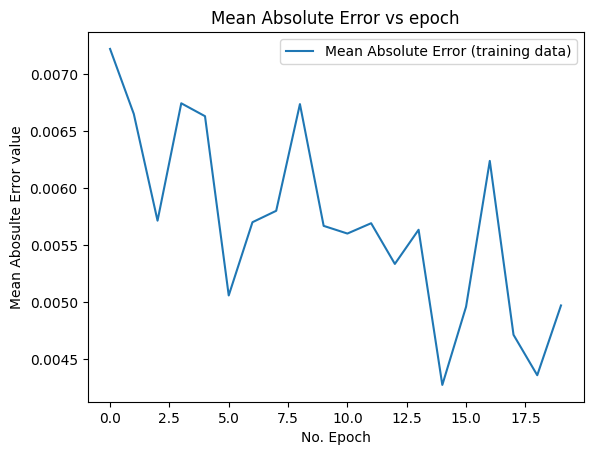

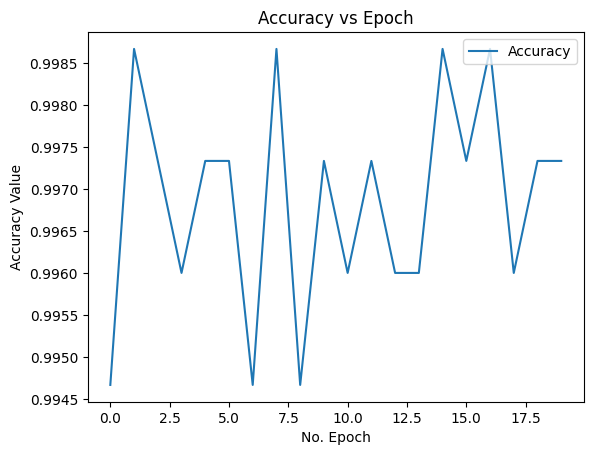

<Figure size 640x480 with 0 Axes>

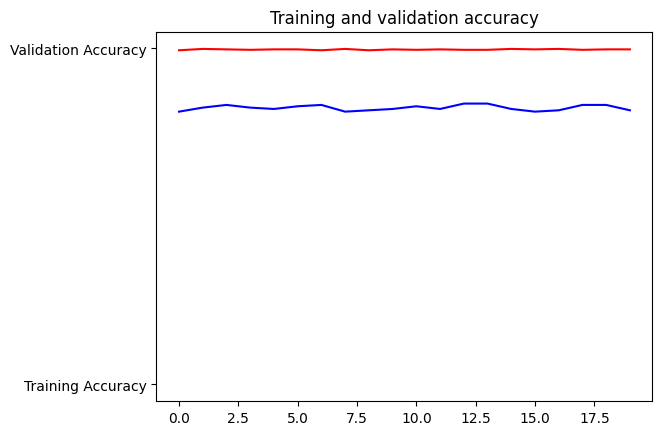

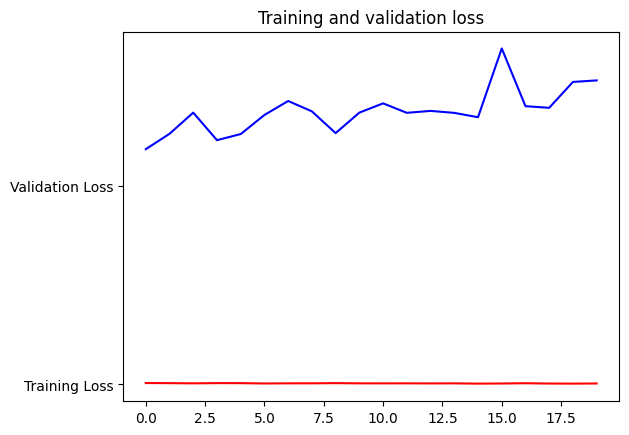

<Figure size 640x480 with 0 Axes>

In [ ]:
# mean abolsute error, accuracy, and training vs validation plots Model1
%matplotlib inline
plt.plot(Model1.history['loss'], label='Mean Absolute Error (training data)')
plt.title('Mean Absolute Error vs epoch')
plt.ylabel('Mean Abosulte Error value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
plt.plot(Model1.history['accuracy'], label='Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy Value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
acc = Model1.history['accuracy']
val_acc = Model1.history['val_accuracy']
loss = Model1.history['loss']
val_loss = Model1.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

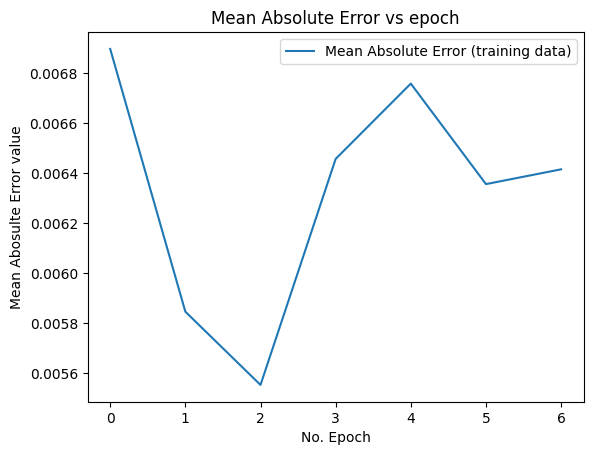

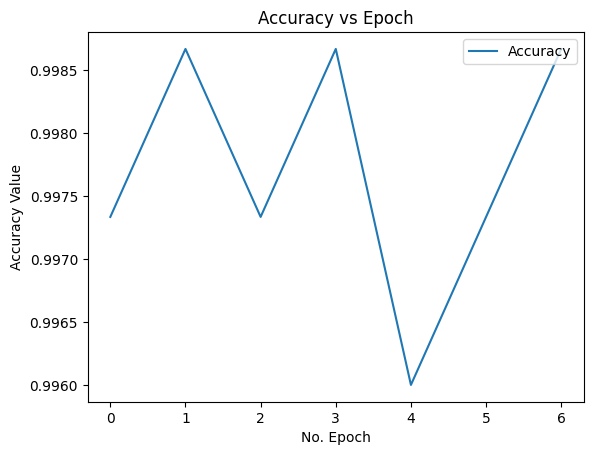

<Figure size 640x480 with 0 Axes>

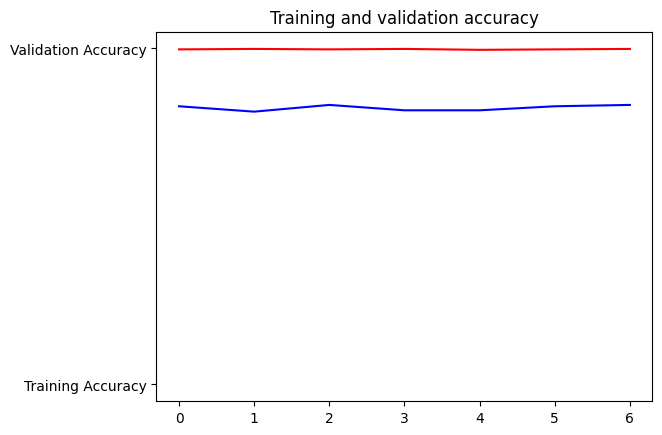

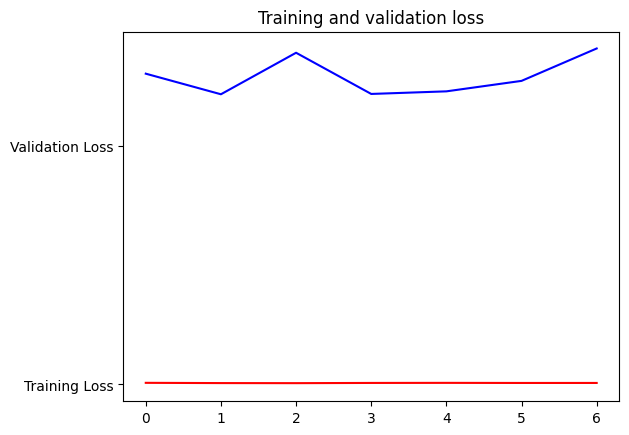

<Figure size 640x480 with 0 Axes>

In [ ]:
# mean abolsute error, accuracy, and training vs validation plots Model2
%matplotlib inline
plt.plot(Model2.history['loss'], label='Mean Absolute Error (training data)')
plt.title('Mean Absolute Error vs epoch')
plt.ylabel('Mean Abosulte Error value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
plt.plot(Model2.history['accuracy'], label='Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy Value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
acc = Model2.history['accuracy']
val_acc = Model2.history['val_accuracy']
loss = Model2.history['loss']
val_loss = Model2.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()